<a href="https://colab.research.google.com/github/pulkitrajput147/ML-projects/blob/master/Project_1_0_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as  np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('./House_Price.csv')

In [ ]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507
75%,25.000000,3.677082,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711


In [ ]:
df['n_hos_beds']=df.n_hos_beds.fillna(df.n_hos_beds.mean())

In [ ]:
df.corr()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
price,1.000000,-0.389582,-0.484754,-0.429300,0.696304,-0.377999,0.251355,0.249459,0.246650,0.248200,0.505655,-0.740836,0.108880,0.023122,-0.047426,-0.391574
crime_rate,-0.389582,1.000000,0.406583,0.420972,-0.219247,0.352734,-0.380050,-0.379813,-0.380069,-0.376462,-0.289946,0.455621,0.017371,0.013518,0.059204,0.383235
resid_area,-0.484754,0.406583,1.000000,0.763651,-0.391676,0.644779,-0.706481,-0.707956,-0.707566,-0.705819,-0.383248,0.603800,0.005799,-0.000839,0.055810,0.707635
air_qual,-0.429300,0.420972,0.763651,1.000000,-0.302188,0.731470,-0.768589,-0.769724,-0.769157,-0.764873,-0.188933,0.590879,-0.049553,-0.004882,0.092104,0.915544
room_num,0.696304,-0.219247,-0.391676,-0.302188,1.000000,-0.240265,0.208464,0.203981,0.201907,0.205397,0.355501,-0.613808,0.032009,0.030674,-0.064694,-0.282817
age,-0.377999,0.352734,0.644779,0.731470,-0.240265,1.000000,-0.746904,-0.746493,-0.747021,-0.746707,-0.261515,0.602339,-0.021012,0.009380,0.075198,0.673850
dist1,0.251355,-0.380050,-0.706481,-0.768589,0.208464,-0.746904,1.000000,0.997905,0.997735,0.994073,0.232834,-0.498823,-0.030365,-0.014463,-0.036794,-0.706319
dist2,0.249459,-0.379813,-0.707956,-0.769724,0.203981,-0.746493,0.997905,1.000000,0.998097,0.994003,0.233707,-0.495693,-0.031071,-0.010239,-0.038005,-0.708237
dist3,0.246650,-0.380069,-0.707566,-0.769157,0.201907,-0.747021,0.997735,0.998097,1.000000,0.994126,0.233588,-0.494290,-0.028315,-0.010077,-0.041470,-0.709346
dist4,0.248200,-0.376462,-0.705819,-0.764873,0.205397,-0.746707,0.994073,0.994003,0.994126,1.000000,0.228256,-0.496084,-0.021534,-0.005850,-0.032542,-0.703508


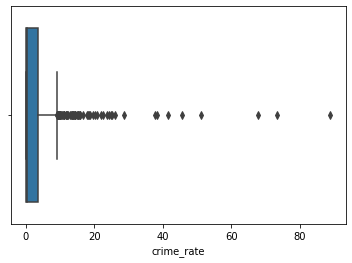

In [ ]:
sns.boxplot(x=df['crime_rate'])

In [ ]:
# removing outliers using z-score
z=np.abs(stats.zscore(df.crime_rate))

In [ ]:
threshold=3
print(np.where(z>3))

(array([380, 398, 404, 405, 410, 414, 418, 427]),)


In [ ]:
df1=df[(z<3)]

In [ ]:
np.percentile(df1.	n_hot_rooms,[99])
upperlimit=np.percentile(df1.	n_hot_rooms,[99])[0]
df1[(df1.n_hot_rooms>upperlimit)]
df1.n_hot_rooms[(df1.n_hot_rooms>3*upperlimit)]=3*upperlimit
lv=np.percentile(df1.rainfall,[1])[0]
df1[(df1.rainfall<lv)]
df1.rainfall[(df1.rainfall<3*lv)]=0.3*lv

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/pyt

In [ ]:
df1['avg_dist']=(df1.dist1+df1.dist2+df1.dist3+df1.dist4)/4
del df1['dist1']
del df1['dist2']
del df1['dist4']
del df1['dist3']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#creating dummies
df1=pd.get_dummies(df1)
del df1['airport_NO']
del df1['waterbody_None']
del df1['rainfall']
del df1['bus_ter_YES']


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

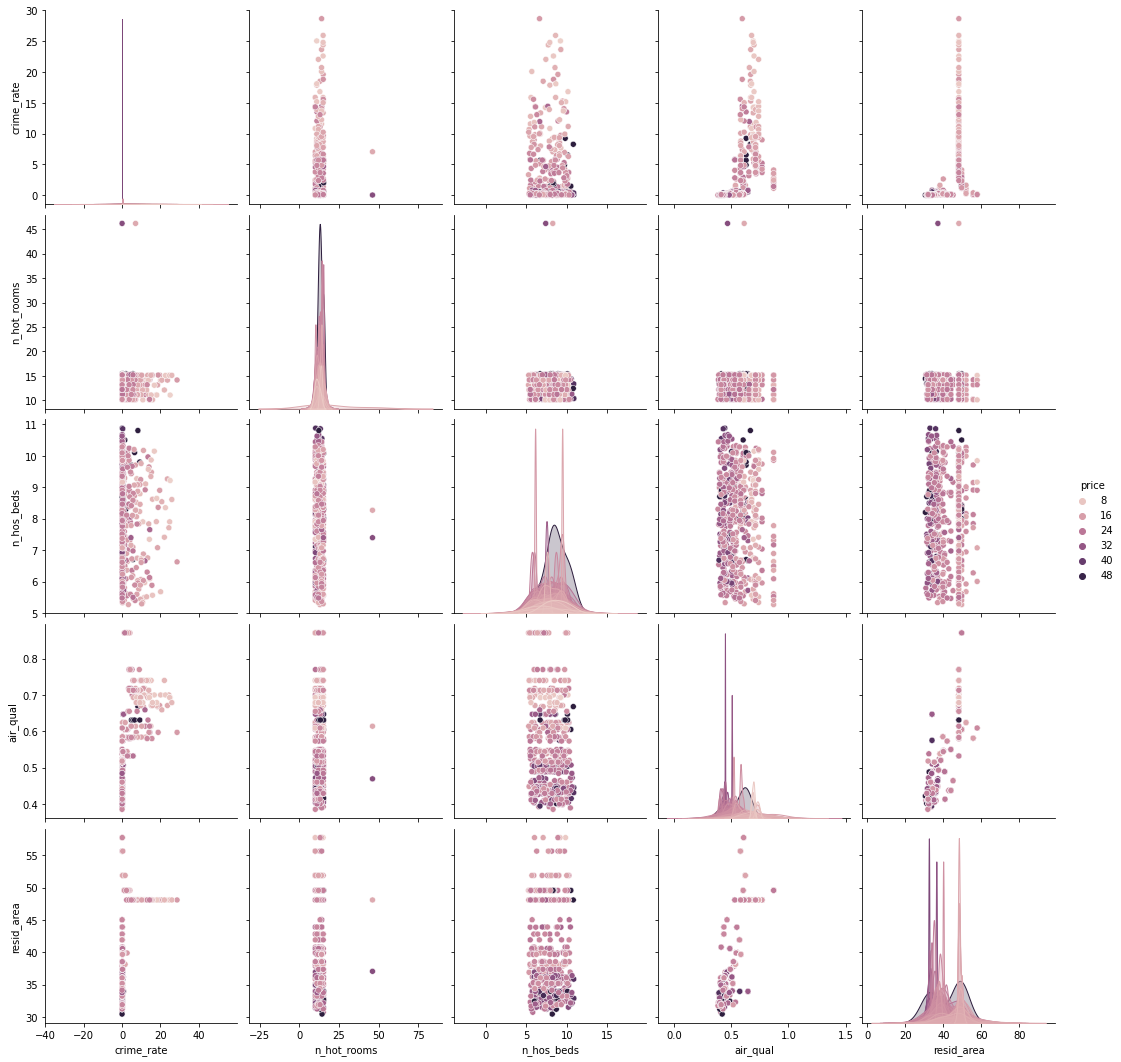

In [ ]:
sns.pairplot(data=df1[['crime_rate','n_hot_rooms','price','n_hos_beds','air_qual','resid_area']],hue='price',dropna=True,height=3)

In [ ]:
X=df1.drop('price',axis=1)
Y=df1['price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
model1=LinearRegression()
model1.fit(X_train,Y_train)
Y_test_a=model1.predict(X_test)
r2_score(Y_test,Y_test_a)

0.7441865682501425